## COM410 - Aprendizado de Máquinas - Semana 5
### Exercício de apoio: Usando o algoritmo k-médias para agrupar tipos de arrozes


Use o algoritmo k-médias para agrupar objetos que pertencem a diferentes espécies de arroz. O conjunto de dados deste exercício é mesmo que foi usado no exercício da Semana 4 para classificação com SVM. Faça os seguintes passos: 

1. Faça o agrupamento usando todos os atributos, exceto **id** e **Class**.
2. Reduza a escala dos valores dos atributos para agilizar a execução do código e melhorar a compactação dos dados.
3. Para este exercício, o número de clusters já é conhecido, mas você pode alterar os outros parâmetros do algoritmo para melhorar o seu desempenho.
4. Use o atributo **Class** para verificar a acurácia do agrupamento.
5. Plote os resultados obtidos pelo classificador.
6. Qual foi o melhor desempenho que você obteve?

O conjunto de dados contém os atributos descritos a seguir, e está disponível no link abaixo: 

https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv

**Atributos**: 

* **id**: identificador do objeto

* **Area**: área do grão

* **MajorAxisLength**: tamanho do eixo principal

* **MinorAxisLength**: tamanho do eixo menor

* **Eccentricity**: excentricidade

* **ConvexArea**: área convexa

* **EquivDiameter**: diâmetro equivalente

* **Extent**: extensão

* **Perimeter**: perímetro

* **Roundness**: redondeza

* **AspectRation**: razão de aspecto

* **Class (atributo alvo)**: tipo de arroz (1 - Jasmine, 0 - Gonen)

**Observações**: 

* A documentação do algoritmo k-médias no scikit-learn está disponível em: 

 * https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

* Se necessário, use o código apresentado na videoaula 13 (Aplicação do algoritmo Fuzzy C-Means) desta semana. Lá, há exemplos de como reduzir a escala de dados e de como plotar os resultados de agrupamento. 


* O dataset deste exercício é baseado no dataset Rice type classification, que está em:   

 * https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

1. Nesta atividade, usaremos as bibliotecas **scikit-learn**, **pandas**, **numpy** e **matplotlib**. Importe as  bibliotecas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams.update({'figure.figsize':[15,10]})
plt.rcParams.update({'font.size': 18})

2.     Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 18185 registros. 

In [ ]:
url = 'https://github.com/higoramario/univesp-com410-aprendizado-de-maquinas/raw/main/rice-classification.csv'
arroz = pd.read_csv(url, sep=',')
arroz.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990,77.417073,50.954344,0.752861,3080,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556,84.323564,55.413061,0.753762,3636,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719,106.721142,68.977700,0.763053,5819,85.332625,0.754983,281.839,0.904748,1.547183,1


In [ ]:
len(arroz)

18185

3. Separando os dados que serão usados para o agrupamento

In [ ]:
forma = arroz[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation']]
especie = arroz['Class']

4. Reduzindo a escala dos dados para melhorar o desempenho

In [ ]:
scaler = StandardScaler()
forma = scaler.fit_transform(forma)

5. Executando o algoritmo k-médias. O resultado é um array com as classes de cada objeto.

In [ ]:
agrupamento = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000)
clusters = agrupamento.fit_predict(forma)

In [ ]:
clusters

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

6. Plotando o agrupamento com cores distintas

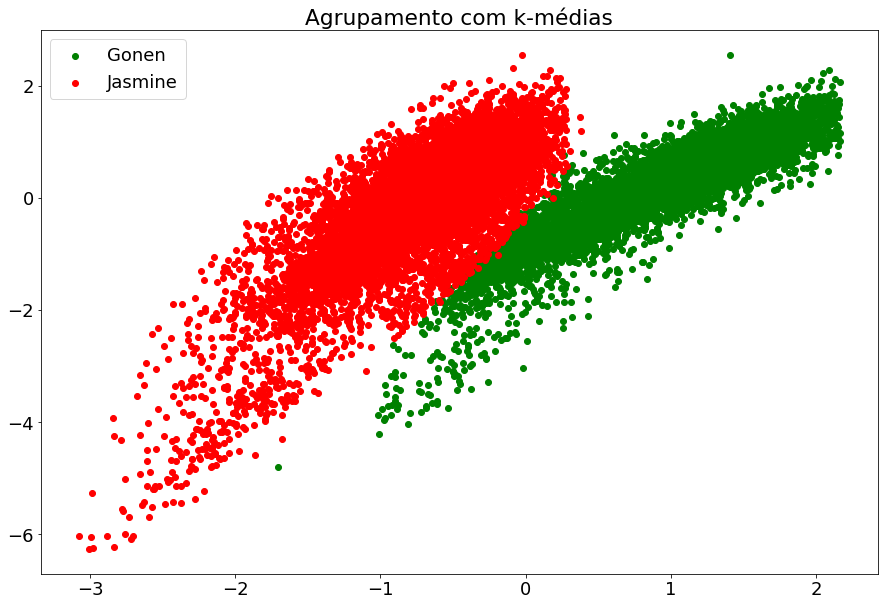

In [ ]:
plt.scatter(forma[clusters == 0, 0], forma[clusters == 0, 1],c='green',label='Gonen')
plt.scatter(forma[clusters == 1, 0], forma[clusters == 1, 1],c='red',label='Jasmine')
plt.title('Agrupamento com k-médias')
plt.legend()
plt.show()

7. Verificando a acurácia obtida.

In [ ]:
acuracia = accuracy_score(especie,clusters)
print('Acurácia de agrupamento: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de agrupamento: 97.7%


Os resultados do k-médias para este conjunto de dados são bem satisfatórios. O que você achou? Compare com a classificação desses dados com SVM da atividade da semana 4. O resultado de agrupamento foi melhor ou pior?

Lembrando que nesse caso, nós temos as classes às quais os objetos pertencem, o que nos permite calcular a acurácia.

**Versões das bibliotecas**

Esse tutorial está usando as seguintes versões de bibliotecas: 

matplotlib==3.2.2

numpy==1.21.6

pandas==1.3.5

scikit-learn==1.0.2